# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


* Import an image.

* Display it.

* Line plot of...
  * Digital counts on X
  * Frequency on Y
  

* Extract mean red, green, and blue values for each image.
  * Plot using box plot
* Convert image data into the HSV color space
* Plot hue values



In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import and display an image

The image must be placed in the folder "IMGS211" on mydrive

In [2]:
from google.colab import drive
from zmq.sugar.frame import Frame
drive.mount("/content/drive",force_remount=True)
import os

os.chdir('/content/drive/MyDrive/IMGS211')

import cv2
from google.colab.patches import cv2_imshow

Mounted at /content/drive


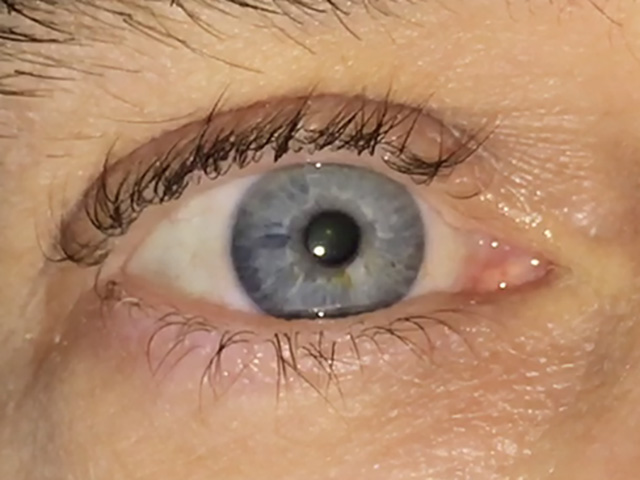

In [3]:
eye_image = cv2.imread('eye1.jpg');
cv2_imshow(eye_image)

# Below, I extract two patches from the image.  

In the subsequent notebook, I will explore the color information in these two patches.

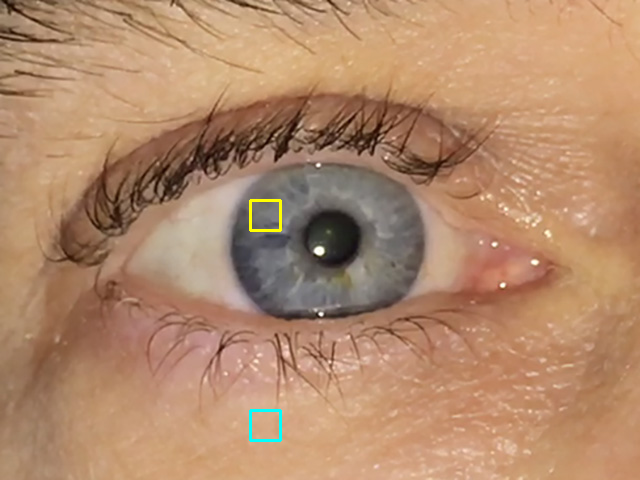

In [4]:
eye_image = cv2.imread('eye1.jpg');

thickness = 2
win_size = [30, 30]

skinbox_color = (255, 255, 0) # In openCV, BGR.  This is BLUE + GREEN (cyan)
skinbox_start_point = np.array([250, 410])
skinbox_end_point = skinbox_start_point + win_size

irisbox_color = (0, 255, 255) # In openCV, BGR.  This is GREEN + RED (yellow)
irisbox_start_point = np.array([250, 200])
irisbox_end_point = irisbox_start_point + win_size

# Add a cyan box to indicate the pupil
eye_image = cv2.rectangle(eye_image, skinbox_start_point, skinbox_end_point, skinbox_color, thickness)

# Add a yellow box to indicate the iris
eye_image = cv2.rectangle(eye_image, irisbox_start_point, irisbox_end_point, irisbox_color, thickness)

cv2_imshow(eye_image)


# Define skin_image, iris_image.

I will use indexing to isolate the sections of the image indicated above.
I will also seperate out color channels (e.g., p_blue, i_blue)


In [5]:
eye_image = cv2.imread('eye1.jpg');

skin_image = eye_image[410:440, 250:280, :]
iris_image = eye_image[200:230, 250:280, :]

cv2_imshow(skin_image)
cv2_imshow(iris_image)

Extract the pixel data for each image's independent color channels.  

In [6]:
s_blue = skin_image[:,:,0]
s_green = skin_image[:,:,1]
s_red = skin_image[:,:,2]

i_blue = iris_image[:,:,0]
i_green = iris_image[:,:,1]
i_red = iris_image[:,:,2]

# Here, I show them for illustrative purposes
cv2_imshow(np.hstack([s_blue, s_green, s_red]))
cv2_imshow(np.hstack([i_blue, i_green, i_red]))

# A description of the method <np.array>.flatten()  

In this notebook, we will characterize the distribution of pixel RGB values and Hue values.  These characterizations do not care where in the image the pixels fall.  

For that reason, we will use the flatten() operation.  See the code below for an explanation of what <np.array>.flatten() does.

In [7]:
print(f'The shape of s_blue is: {np.shape(s_blue)}.')
print(f'That means it has {np.shape(s_blue)[0]} rows and {np.shape(s_blue)[1]} columns')
print(f'The total number of pixels is the product of those two numbers: {np.product(np.shape(s_blue))} pixels.')

print(f'\nUsing the <np.array>.flatten() operation concatenates all the rows of the multidimensional array into a one dimensional array')
print(f'It makes sense then that the shape of s_blue.flatten() is: {np.shape(s_blue.flatten())}')

The shape of s_blue is: (30, 30).
That means it has 30 rows and 30 columns
The total number of pixels is the product of those two numbers: 900 pixels.

Using the <np.array>.flatten() operation concatenates all the rows of the multidimensional array into a one dimensional array
It makes sense then that the shape of s_blue.flatten() is: (900,)


# A scatter plot of image patches

Below, I visualize the range of blue, green, and red pixel values in the image.

([<matplotlib.axis.XTick at 0x7b928cfc2450>,
 [Text(1, 0, 'blue'), Text(2, 0, 'green'), Text(3, 0, 'red')])

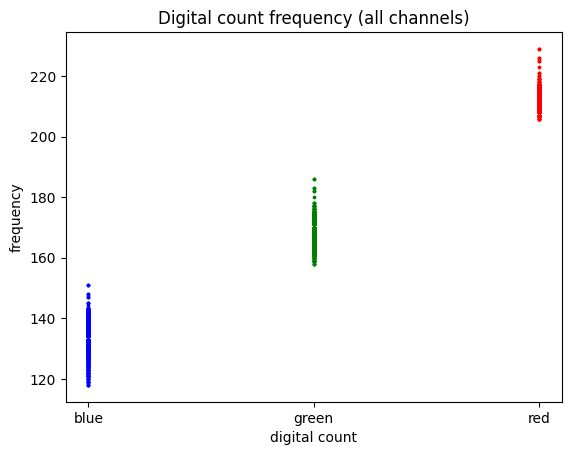

In [26]:

# We need an x value for every y value.
# We have len(s_blue.flatten() y values.
# Below, I use a trick to repeat the list [1] that many times!
x_data = [1] * len(s_blue.flatten()) # Multipy a list by an integer to repeat the list

plt.scatter( x_data, s_blue.flatten(), s = 3, c='b')
plt.scatter( [2] * len(s_green.flatten()), s_green.flatten(), s = 3, c='g')
plt.scatter( [3] * len(s_red.flatten()), s_red.flatten(), s = 3, c='r')

# Adding the title
plt.title("Digital count frequency (all channels)")

# Adding the labels
plt.ylabel("frequency")
plt.xlabel("digital count")

# Change tick labels
plt.xticks([1,2,3],['blue','green','red'])

# Plot the mean and standard deviation

([<matplotlib.axis.XTick at 0x7b92c265fd90>,
 [Text(1, 0, 'blue'), Text(2, 0, 'green'), Text(3, 0, 'red')])

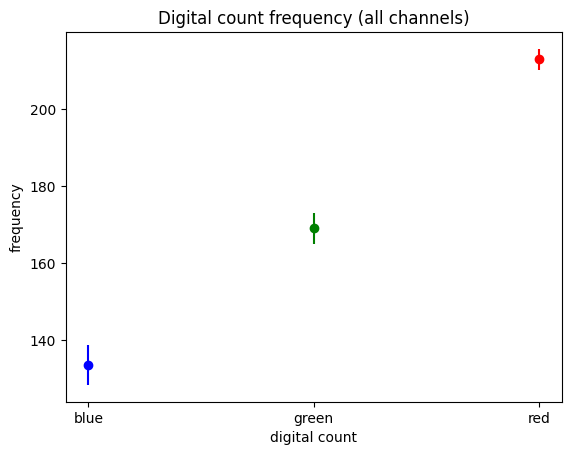

In [9]:
# basic Box plot
plt.errorbar(1, np.mean(s_blue.flatten()),
             yerr = np.std(s_blue.flatten()),
             fmt ='o',
             c='b') # set color to blue


plt.errorbar(2, np.mean(s_green.flatten()),
             yerr = np.std(s_green.flatten()),
             fmt ='o',
             c='g')

plt.errorbar(3, np.mean(s_red.flatten()),
             yerr = np.std(s_red.flatten()),
             fmt ='o',
             c='r')

# Adding the title
plt.title("Digital count frequency (all channels)")

# Adding the labels
plt.ylabel("frequency")
plt.xlabel("digital count")

# Change tick labels
plt.xticks([1,2,3],['blue','green','red'])

# Box plot

([<matplotlib.axis.XTick at 0x7b92c24ec050>,
 [Text(1, 0, 'blue'), Text(2, 0, 'green'), Text(3, 0, 'red')])

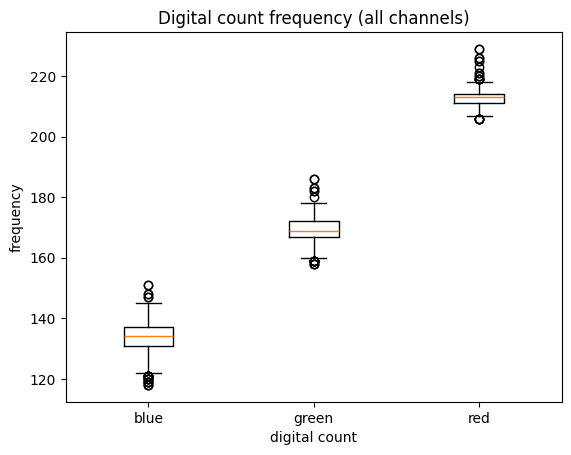

In [10]:
# basic Box plot
plt.boxplot([s_blue.flatten(),s_green.flatten(),s_red.flatten() ]);

# Adding the title
plt.title("Digital count frequency (all channels)")

# Adding the labels
plt.ylabel("frequency")
plt.xlabel("digital count")

# Change tick labels
plt.xticks([1,2,3],['blue','green','red'])

## Plot the number of occurrances of each value in each channel


In [11]:

b_values, b_counts = np.unique(s_blue.flatten(), return_counts=True)
g_values, g_counts = np.unique(s_green.flatten(), return_counts=True)
r_values, r_counts = np.unique(s_red.flatten(), return_counts=True)


Text(0.5, 0, 'digital count')

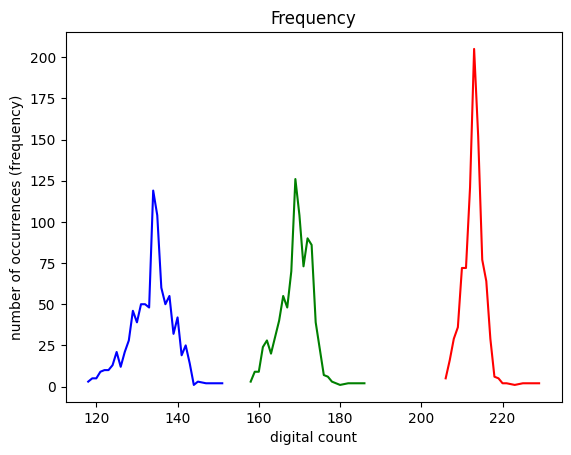

In [12]:
plt.plot(b_values, b_counts,'b')
plt.plot(g_values, g_counts,'g')
plt.plot(r_values, r_counts,'r')

# Adding the title
plt.title("Frequency")

# Adding the labels
plt.ylabel("number of occurrences (frequency)")
plt.xlabel("digital count")

In [13]:
# b_values, b_counts = np.unique(s_blue.flatten(), return_counts=True,)
# g_values, g_counts = np.unique(s_green.flatten(), return_counts=True,)
# r_values, r_counts = np.unique(s_red.flatten(), return_counts=True,)

# # The relative frequency is the number of each type of occurance divided by the total number of occurances.
# plt.plot(b_values, b_counts/sum(b_counts),'b')
# plt.plot(g_values, g_counts/sum(g_counts),'g')
# plt.plot(r_values, r_counts/sum(r_counts),'r')

# # Adding the title
# plt.title("Relative Frequency")

# # Adding the labels
# plt.ylabel("relative frequency")
# plt.xlabel("digital count")

# What if we need to compare the color of two images?


This is difficult with RBG, because the color channels influence on appearance is not independent.  This would be more informative if we view the color in the HSV color space.  This way, we can look at just the hue, independent of saturation and value.

<img src="https://raw.githubusercontent.com/gabrielDiaz-performlab/IMGS-211-Instructional-Notebooks/main/IMGS_211_notebook_resources/hsv_cylinder.png" alt="hsv colorspace" width="300"/>

Note that in opencv, the hue value is represented within the range of 0-180, as in the image below.


<img src="https://answers.opencv.org/upfiles/15186768416857101.png" alt="hsv colorspace" width="300"/>


Let's compare an image patch from the pupil with one from the iris.  Here are the patch locations I've selected for you.

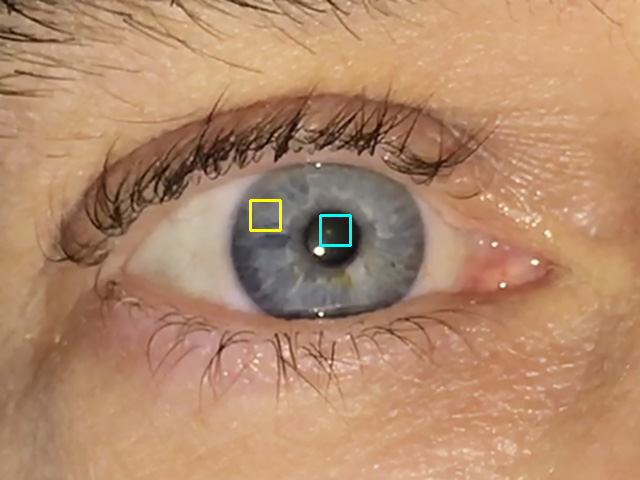

In [14]:
eye_image = cv2.imread('eye1.jpg');

thickness = 2
win_size = [30, 30]

pupilbox_color = (255, 255, 0) # In openCV, BGR.  This is BLUE + GREEN (cyan)
pupilbox_start_point = np.array([320, 215])
pupilbox_end_point = pupilbox_start_point + win_size

irisbox_color = (0, 255, 255) # In openCV, BGR.  This is GREEN + RED (yellow)
irisbox_start_point = np.array([250, 200])
irisbox_end_point = irisbox_start_point + win_size

# Add a cyan box to indicate the pupil
eye_image = cv2.rectangle(eye_image, pupilbox_start_point, pupilbox_end_point, pupilbox_color, thickness)

# Add a yellow box to indicate the iris
eye_image = cv2.rectangle(eye_image, irisbox_start_point, irisbox_end_point, irisbox_color, thickness)

cv2_imshow(eye_image)


Below, I isolate the patches into two new images, and covert them into the HSV colorpsace representation.

In [15]:
eye_image = cv2.imread('eye1.jpg');

# Grab the two image patches indicated above
pupil_image = eye_image[215:245, 320:350, :]
iris_image = eye_image[200:230, 250:280, :]

# show the image
# cv2_imshow(pupil_image)

# Convert to HSV
pupil_hsv = cv2.cvtColor(pupil_image, cv2.COLOR_BGR2HSV)
print(f'The dimensions of pupil_hsv are:  {np.shape(pupil_hsv)}' )

cv2_imshow(iris_image)
iris_hsv = cv2.cvtColor(iris_image, cv2.COLOR_BGR2HSV)
print(f'The dimensions of iris_hsv are:  {np.shape(iris_hsv)}' )

The dimensions of pupil_hsv are:  (30, 30, 3)


The dimensions of iris_hsv are:  (30, 30, 3)


### Plot the hue values for the two image patches using errorbar()

([<matplotlib.axis.XTick at 0x7b928dd61e90>,
 [Text(1, 0, 'pupil'), Text(2, 0, 'iris')])

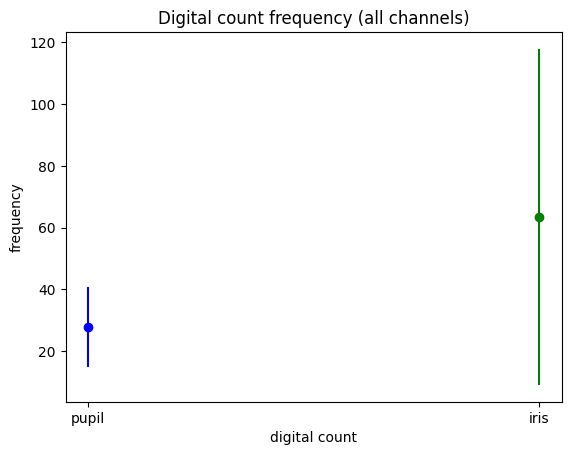

In [16]:

plt.errorbar(1, np.mean(pupil_hsv[:,:,0].flatten()),
             yerr = np.std(pupil_hsv[:,:,0].flatten()),
             fmt ='o',
             c='b') # set color to blue


plt.errorbar(2, np.mean(iris_hsv[:,:,0].flatten()),
             yerr = np.std(iris_hsv[:,:,0].flatten()),
             fmt ='o',
             c='g')

# Adding the title
plt.title("Digital count frequency (all channels)")

# Adding the labels
plt.ylabel("frequency")
plt.xlabel("digital count")

# Change tick labels
plt.xticks([1,2],['pupil','iris'])

### Plot the hue values for the two image patches using a violin plot

([<matplotlib.axis.XTick at 0x7b928dd82f90>,
 [Text(1, 0, 'pupil'), Text(2, 0, 'iris')])

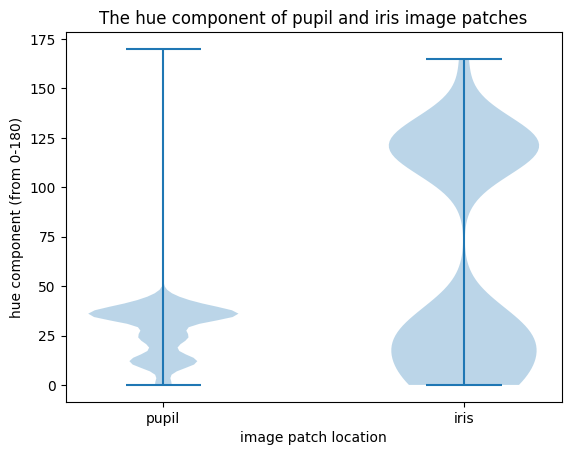

In [17]:
# basic plot
plt.box([pupil_hsv[:,:,0].flatten(), iris_hsv[:,:,0].flatten()]);
plt.violinplot([pupil_hsv[:,:,0].flatten(), iris_hsv[:,:,0].flatten()]);

# Adding the title
plt.title("The hue component of pupil and iris image patches")

# Adding the labels
plt.ylabel("hue component (from 0-180)")
plt.xlabel("image patch location")

# Change tick labels
plt.xticks([1,2],['pupil', 'iris'])



([<matplotlib.axis.XTick at 0x7b928ddf2f90>,
 [Text(1, 0, 'pupil'), Text(2, 0, 'iris')])

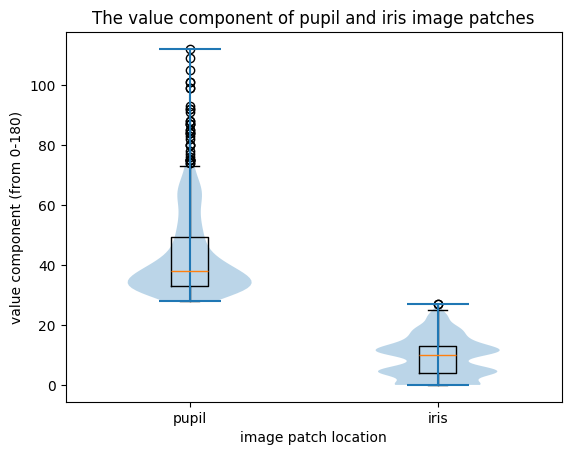

In [18]:
# basic plot
plt.boxplot([pupil_hsv[:,:,2].flatten(), iris_hsv[:,:,1].flatten()]);
plt.violinplot([pupil_hsv[:,:,2].flatten(), iris_hsv[:,:,1].flatten()]);

# Adding the title
plt.title("The value component of pupil and iris image patches")

# Adding the labels
plt.ylabel("value component (from 0-180)")
plt.xlabel("image patch location")

# Change tick labels
plt.xticks([1,2],['pupil', 'iris'])
